<a href="https://www.kaggle.com/code/melaneemelanee/digikala-analysis?scriptVersionId=144580248" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

I am [Melanee](https://github.com/Melanee-Melanee) and this notebook is the first [Digikala](https://www.digikala.com/) data is taken fram kaggel:

https://www.kaggle.com/datasets/kamyababedi/digikala-orders

If you find this notebook useful plz upvote it :). 


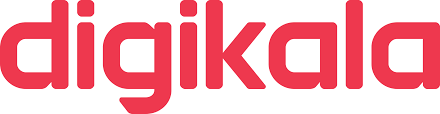

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('../input/digikala/digikala/3-p5s3708k.csv')

In [ ]:
#lets see the shape of dataset(the number of rows, the number of columns)
df.shape

In [ ]:
df.head(10-20)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['Amount_Gross_Order'].describe()

* We can see that the Minimum value is 0 and Maximum value is 433014, there is huge difference so both mean and median function would not work for replacing null values if we had.
* Also, there is a huge difference in the 25th, 50th, and 75th percentiles indicating that if we impute the values for "Amount_Gross_Order" column we will most probably introduce bias into the data.

In [ ]:
df[['Amount_Gross_Order','Quantity_item']].describe()

In [ ]:
#check the mean value for 'Amount_Gross_Order' column:
df['Amount_Gross_Order'].mean()

So the average amount of gross order was:1458204.043815 tomans(rials)

In [ ]:
df.info()

# Checking missing values

In [ ]:
# lets first check if there is any null value present in the data
df.isnull().sum().sum()

In [ ]:
# lets check the number of missing values in the dataset
# we are check the missing values in the context of columns
df.isnull().sum()

In [ ]:
#removing missing values
#documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df.dropna()

In [ ]:
#lets check the info again
df.info()

In [ ]:
# percentage of missing values
percentage_of_missing_values = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percentage_of_missing_values)

In [ ]:
df['city_name_fa'].value_counts()


In [ ]:
#lets see all cities
print(df['city_name_fa'].unique())
print('Total number of unique cities are:', df['city_name_fa'].nunique())

# Ckecking Outliers

In [ ]:
#checking univariate outliers for int data
plt.rcParams['figure.figsize']=(16,4)
plt.subplot(1,2,1)
sns.boxplot(df['Amount_Gross_Order'])

plt.subplot(1,2,2)
sns.boxplot(df['Quantity_item'])

plt.suptitle("Checking for Univariate Outliers")
plt.show()

The results show that **Tehran** had the most orders among other cities. 

In [ ]:
#Checking for the bivariate outliers wrt Target variable.

plt.subplot(1,2,1)
sns.scatterplot(y=df['ID_Order'],x=df['Amount_Gross_Order'])

plt.subplot(1,2,2)
sns.scatterplot(y=df['ID_Order'],x=df['Quantity_item'])


plt.suptitle("Checking for Bivariate Outliers")
plt.show()

In [ ]:
#Capping the outliers in the columns having values greater than 50.
df['Quantity_item'].values[df['Quantity_item'].values>50]=50


In [ ]:
df['Amount_Gross_Order'].values[df['Amount_Gross_Order'].values>200000000]=200000000

In [ ]:
#Checking if there is still any value greater than 10000 left in the Quantity_item column

df[df['Quantity_item']>50]
df[df['Amount_Gross_Order']>200000000]


In [ ]:
#Dealing with the bivariate outliers
#we delete all the values which are greater than 50 

df=df[~(df['Quantity_item']>50)]
df=df[~(df['Amount_Gross_Order']>200000000)]

In [ ]:
#checking again
plt.subplot(1,2,1)
sns.scatterplot(y=df['ID_Order'],x=df['Amount_Gross_Order'])

plt.subplot(1,2,2)
sns.scatterplot(y=df['ID_Order'],x=df['Quantity_item'])


plt.suptitle("Checking for Bivariate Outliers")
plt.show()

# Splitting in string data

In [ ]:
df['DateTime_CartFinalize'].str.split(' ')


In [ ]:
df = df.explode('DateTime_CartFinalize')
pd.set_option('max_rows', 200000)
df['DateTime_CartFinalize'].value_counts()[:20]



Digikiala had the most orders in these times:
2017-05-07 16:07:39.000    
2016-02-23 09:03:50.000    
2016-05-17 17:40:25.000    
2016-06-06 02:12:05.000    
2016-02-29 13:23:57.000    

# Visuailization 

In [ ]:
plt.rcParams['figure.figsize'] = (10, 3)
plt.style.use('fivethirtyeight')
sns.distplot(df['Amount_Gross_Order'], color = 'black')
plt.title('Distribution of Ratings')
plt.show()


In [ ]:

sns.pairplot(data = df, hue="Amount_Gross_Order")
#sns.pairplot(df['Amount_Gross_Order'], df['ID_Order'], data=df)
#sns.barplot(df['ID_Order'])



In [ ]:
df.corr()

In [ ]:
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()